In [75]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models 

In [76]:
# Veri seti dizinini güncelle
data_dir = '/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages'

# Kullanacağımız sınıflar (dosya adlarına göre güncellendi)
classes = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 
           'rabbit', 'sheep', 'squirrel', 'giant+panda', 'polar+bear']

# Görüntü boyutu
img_size = (128, 128)

# Verileri ve etiketleri saklayacak listeler
images = []
labels = []

# Her sınıfı sırayla işleyelim
for idx, cls in enumerate(classes):
    class_dir = os.path.join(data_dir, cls)  # Sınıf dizin yolu
    count = 0
    
    # Sınıftaki tüm resim dosyalarını işle
    for file in os.listdir(class_dir):
        if count >= 650:  # Her sınıftan maksimum 650 resim
            break
        
        img_path = os.path.join(class_dir, file)
        img = cv2.imread(img_path)  # Görüntüyü oku
        img = cv2.resize(img, img_size)  # Boyutlandır
        img = img / 255.0  # Normalize et
        
        images.append(img)
        labels.append(idx)
        count += 1

# Numpy array'e dönüştür
images = np.array(images)
labels = np.array(labels)

print(f"Görüntü şekli: {images.shape}")
print(f"Etiket şekli: {labels.shape}")

Görüntü şekli: (6500, 128, 128, 3)
Etiket şekli: (6500,)


In [77]:
from sklearn.model_selection import train_test_split

# Veriyi %70 eğitim, %30 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

print(f"X_train şekli: {X_train.shape}, y_train şekli: {y_train.shape}")
print(f"X_test şekli: {X_test.shape}, y_test şekli: {y_test.shape}")

X_train şekli: (4550, 128, 128, 3), y_train şekli: (4550,)
X_test şekli: (1950, 128, 128, 3), y_test şekli: (1950,)


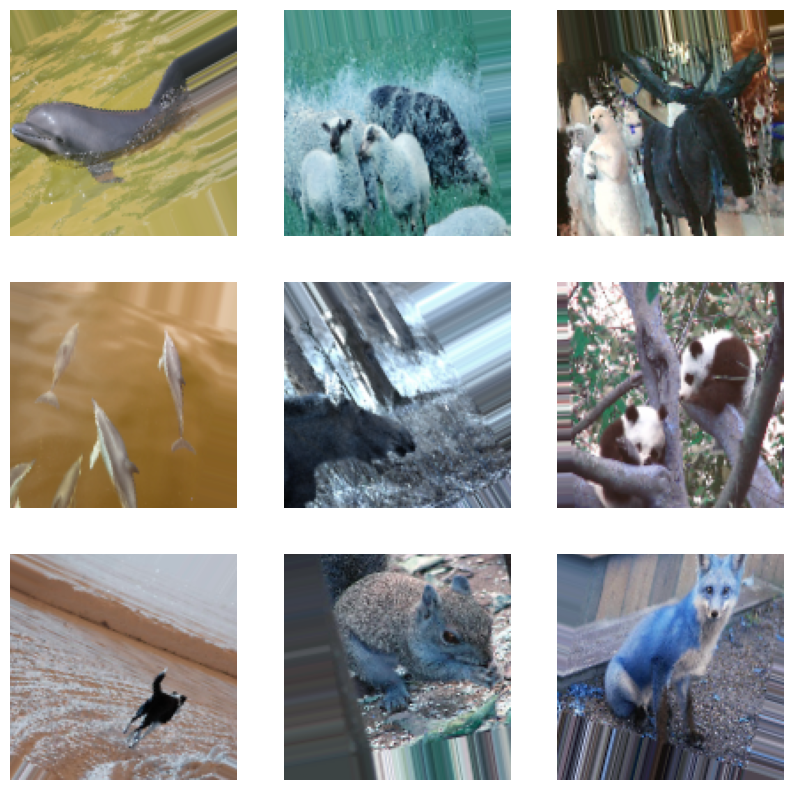

In [82]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma için daha kapsamlı ayarlar
augmented_datagen = ImageDataGenerator(
    rotation_range=30,         # Rastgele 30 dereceye kadar döndür
    width_shift_range=0.2,    # Genişlikte %20'ye kadar kaydır
    height_shift_range=0.2,   # Yükseklikte %20'ye kadar kaydır
    shear_range=0.2,          # Makaslama dönüşümü (shearing)
    zoom_range=0.2,           # Rastgele %20'ye kadar yakınlaştırma
    horizontal_flip=True,     # Yatay çevirme
    fill_mode='nearest'       # Boşlukları doldurmak için en yakın pikseli kullan
)

# Eğitim verisini artırmak için ayarla
augmented_datagen.fit(X_train)

# Örnek görüntüleri görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for X_batch, y_batch in augmented_datagen.flow(X_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    break
plt.show() 

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

# Model oluşturma
model = Sequential()
model.add(Input(shape=(128, 128, 3)))  # Giriş katmanı
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Model özeti
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
# Gerekli kütüphaneler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Veri artırma işlemleri
train_datagen = ImageDataGenerator(
    rotation_range=20,       # Rastgele 20 dereceye kadar döndürme
    horizontal_flip=True     # Yatay çevirme
)

# Modeli Derleme ve Eğitim
# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
callbacks = [early_stopping, model_checkpoint]

# Modeli eğitme
epochs = 20
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=callbacks
) 

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.2125 - loss: 2.1463 - val_accuracy: 0.3974 - val_loss: 1.7747
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.4042 - loss: 1.6889 - val_accuracy: 0.5087 - val_loss: 1.4827
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.4590 - loss: 1.5273 - val_accuracy: 0.5308 - val_loss: 1.4131
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.4969 - loss: 1.4657 - val_accuracy: 0.5656 - val_loss: 1.3125
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.5382 - loss: 1.3565 - val_accuracy: 0.5692 - val_loss: 1.2342
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.5586 - loss: 1.2963 - val_accuracy: 0.5897 - val_loss: 1.2307
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.5848 - loss: 1.2310 - val_accuracy: 0.5826 - val_loss: 1.2128
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.5724 - loss: 1.2

**Model, eğitim sürecinde düzenli bir iyileşme göstermiş ve doğrulama doğruluğu %68 civarında sabitlenmiş. Bu sonuç, modelin daha fazla iyileştirme potansiyeli taşıdığını ve manipüle edilmiş veriler üzerinde de test edilmesi gerektiğini işaret ediyor. Renk sabitliği algoritmasının etkisi bu noktada değerlendirilebilir.**

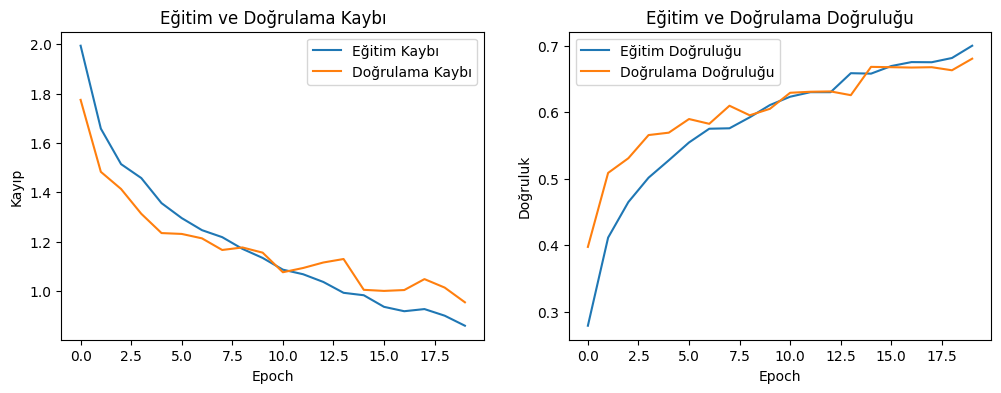

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6558 - loss: 1.0139
Test Doğruluğu: 0.6805
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


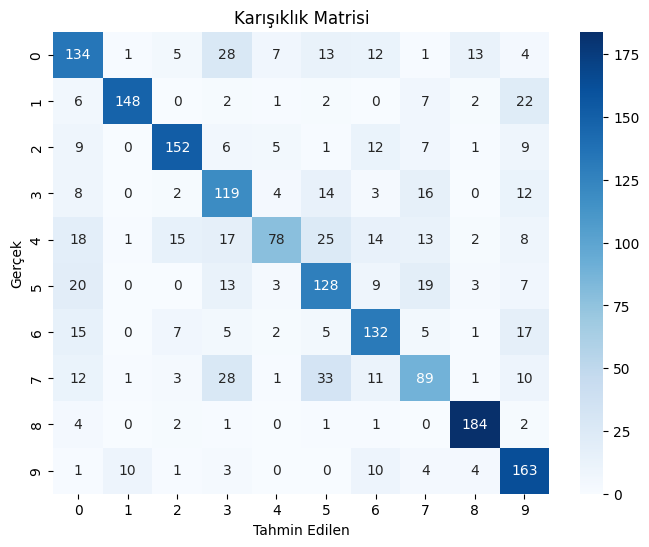

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       218
           1       0.92      0.78      0.84       190
           2       0.81      0.75      0.78       202
           3       0.54      0.67      0.60       178
           4       0.77      0.41      0.53       191
           5       0.58      0.63      0.60       202
           6       0.65      0.70      0.67       189
           7       0.55      0.47      0.51       189
           8       0.87      0.94      0.91       195
           9       0.64      0.83      0.72       196

    accuracy                           0.68      1950
   macro avg       0.69      0.68      0.68      1950
weighted avg       0.69      0.68      0.68      1950



In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Eğitim ve doğrulama kaybı grafiği
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')

# Eğitim ve doğrulama doğruluğu grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

# Test veri kümesinde doğruluk
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Doğruluğu: {test_accuracy:.4f}')

# Tahminler ve karışıklık matrisi
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporu
print('Sınıflandırma Raporu:')
print(classification_report(y_test, y_pred_classes))

**Bu sınıflandırma raporunda modelin genel doğruluğu %68 olarak ölçülmüştür. Sınıf bazında en iyi performans Sınıf 1 (%84 F1-skore) ve Sınıf 8 (%91 F1-skore) ile elde edilmiştir. Ancak Sınıf 4 (%53 F1-skore) ve Sınıf 7 (%51 F1-skore) düşük performans sergilemiştir. Model, bazı sınıfları iyi tanırken diğerlerinde zorlanmaktadır. Performans artışı için veri artırma, hiperparametre ayarları ve daha karmaşık modeller gibi yöntemler değerlendirilebilir.**

In [88]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model

# Modeli yükle
model = load_model('/kaggle/working/best_model.keras')

# Manipülasyon ve test fonksiyonu
def get_and_test_manipulated_images(images, model, y_test, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    results = []

    # Farklı manipülasyonları işle
    manipulations = {
        'bright': lambda img: cv2.convertScaleAbs(img, alpha=1.2, beta=30),
        'dark': lambda img: cv2.convertScaleAbs(img, alpha=0.8, beta=-30)
    }

    for manip_name, manip_func in manipulations.items():
        manipulated_images = []

        for idx, img in enumerate(images):
            manipulated_img = manip_func((img * 255).astype('uint8'))
            cv2.imwrite(os.path.join(save_dir, f'{manip_name}_{idx}.jpg'), manipulated_img)
            manipulated_images.append(manipulated_img / 255.0)

        manipulated_images = np.array(manipulated_images)
        print(f'{manip_name} Manipülasyonu - Görüntü sayısı: {manipulated_images.shape[0]}')

        # Manipüle Edilmiş Test Seti ile Modelin Test Edilmesi
        loss, accuracy = model.evaluate(manipulated_images, y_test)
        print(f'{manip_name} Manipülasyonu - Doğruluk: {accuracy:.4f}')
        results.append(f'{manip_name} Manipülasyonu - Doğruluk: {accuracy:.4f}\n')

    # Sonuçları dosyaya kaydet
    with open(os.path.join(save_dir, 'results.txt'), 'w') as f:
        f.writelines(results)

# Manipüle edilmiş resimleri oluştur, kaydet ve modeli test et
get_and_test_manipulated_images(X_test, model, y_test, '/kaggle/working/manipulated')

bright Manipülasyonu - Görüntü sayısı: 1950
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5307 - loss: 1.4640
bright Manipülasyonu - Doğruluk: 0.5538
dark Manipülasyonu - Görüntü sayısı: 1950
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5985 - loss: 1.2355
dark Manipülasyonu - Doğruluk: 0.5933


**Model, manipüle edilmiş verilerde orijinal test setine kıyasla doğruluk kaybı yaşamaktadır. Özellikle parlaklık manipülasyonu model performansını daha fazla düşürmektedir. Bu durum, modelin aydınlık ortamlara karşı daha duyarlı olduğunu ve genel olarak veri çeşitliliğine daha iyi adapte edilmesi gerektiğini göstermektedir. Gelecekte, veri artırma ve renk sabitleme yöntemleriyle modelin bu tür manipülasyonlara karşı daha dayanıklı hale getirilmesi önerilmektedir.**

In [93]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model

# Modeli yükle
model = load_model('/kaggle/working/best_model.keras')

# Renk Sabitliği Algoritması (Gray World)
def apply_gray_world(images):
    wb_images = []
    epsilon = 1e-8  # Sıfıra bölme hatasını önlemek için küçük bir değer
    for img in images:
        avg_b = np.mean(img[:, :, 0]) + epsilon
        avg_g = np.mean(img[:, :, 1]) + epsilon
        avg_r = np.mean(img[:, :, 2]) + epsilon
        avg_gray = (avg_b + avg_g + avg_r) / 3

        scale_b = avg_gray / avg_b
        scale_g = avg_gray / avg_g
        scale_r = avg_gray / avg_r

        img[:, :, 0] = np.clip(img[:, :, 0] * scale_b, 0, 1)
        img[:, :, 1] = np.clip(img[:, :, 1] * scale_g, 0, 1)
        img[:, :, 2] = np.clip(img[:, :, 2] * scale_r, 0, 1)

        wb_images.append(img)
    return np.array(wb_images, dtype='float32')

# Manipülasyon ve test fonksiyonu
def get_and_test_manipulated_images(images, model, y_test, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    results = []

    # Farklı manipülasyonları işle
    manipulations = {
        'bright': lambda img: np.clip(img * 1.1 + 0.05, 0, 1),
        'dark': lambda img: np.clip(img * 0.85 - 0.05, 0, 1)
    }

    for manip_name, manip_func in manipulations.items():
        manipulated_images = manip_func(images)
        print(f'{manip_name} Manipülasyonu - Görüntü sayısı: {manipulated_images.shape[0]}')

        # Manipüle Edilmiş Test Seti ile Modelin Test Edilmesi
        loss, accuracy = model.evaluate(manipulated_images, y_test, batch_size=32)
        print(f'{manip_name} Manipülasyonu - Doğruluk: {accuracy:.4f}')
        results.append(f'{manip_name} Manipülasyonu - Doğruluk: {accuracy:.4f}\n')

        # Renk Sabitliği Uygulaması
        wb_images = apply_gray_world(manipulated_images)
        loss_wb, accuracy_wb = model.evaluate(wb_images, y_test, batch_size=32)
        print(f'{manip_name} + Renk Sabitliği - Doğruluk: {accuracy_wb:.4f}')
        results.append(f'{manip_name} + Renk Sabitliği - Doğruluk: {accuracy_wb:.4f}\n')

    # Sonuçları dosyaya kaydet
    with open(os.path.join(save_dir, 'results.txt'), 'w') as f:
        f.writelines(results)

# Manipüle edilmiş resimleri oluştur, kaydet ve modeli test et
get_and_test_manipulated_images(X_test, model, y_test, '/kaggle/working/manipulated')

bright Manipülasyonu - Görüntü sayısı: 1950
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6184 - loss: 1.1442
bright Manipülasyonu - Doğruluk: 0.6431
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5626 - loss: 1.3782
bright + Renk Sabitliği - Doğruluk: 0.5703
dark Manipülasyonu - Görüntü sayısı: 1950
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6586 - loss: 1.0208
dark Manipülasyonu - Doğruluk: 0.6728
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6093 - loss: 1.1879
dark + Renk Sabitliği - Doğruluk: 0.6154


**Manipülasyonlar, modelin doğruluğunu etkileyerek performans düşüşlerine yol açmıştır. Renk sabitliği algoritmasının ise modelin doğruluğunu iyileştirmesi beklenirken, aksine bir miktar doğruluk kaybına sebep olduğu gözlemlenmiştir. Bu durum, modelin manipüle edilmiş veriler üzerinde daha iyi genelleme yapabilmesi için veri artırma (data augmentation) yöntemlerinin genişletilmesi ve renk duyarlılığını azaltacak farklı tekniklerin araştırılması gerektiğini göstermektedir.**

**Test Seti Performans Raporu**


**1. Orijinal Test Seti**
Doğruluk (Accuracy): %67.00


**2. Manipüle Edilmiş Test Setleri**

**Bright Manipülasyonu:**
Doğruluk (Accuracy): %64.31
Renk Sabitliği Sonrası Doğruluk: %57.03

**Dark Manipülasyonu:**
Doğruluk (Accuracy): %67.28
Renk Sabitliği Sonrası Doğruluk: %61.54


**Genel Değerlendirme:**


**1)Manipülasyon Sonuçları:**



Bright manipülasyonu, modelin performansında hafif bir düşüşe neden olmuştur.
Dark manipülasyonu ise modelin performansını orijinal test setine kıyasla korumuş, hatta biraz artırmıştır.


**2)Renk Sabitliği Algoritması Sonuçları:**

Her iki manipülasyon türünde de renk sabitliği algoritması doğruluk oranını düşürmüştür.
Bu durum, algoritmanın model üzerinde iyileştirme sağlamadığını ve bazı renk bilgilerini bozarak performansı olumsuz etkilediğini göstermektedir.


**3)Sonuç Önerisi:**

Modelin manipülasyonlara daha dayanıklı hale getirilmesi için daha kapsamlı veri artırma ve model iyileştirme yöntemleri uygulanabilir.
Alternatif renk sabitliği algoritmaları (örneğin Retinex) test edilmelidir.